In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('official_api_tools/poe_races.db')

In [3]:
c = conn.cursor()

Let's see how many character (a.k.a. toon) records over all the different ladders there are.

In [4]:
c.execute('''
          SELECT COUNT(*) FROM ladders;
          ''')
c.fetchall()

[(5140057,)]

What information do we have for each character?

In [5]:
c.execute('''
          PRAGMA table_info(ladders); 
          ''')
c.fetchall()

[(0, 'id', 'text', 0, None, 0),
 (1, 'account', 'text', 0, None, 0),
 (2, 'twitch', 'text', 0, None, 0),
 (3, 'challenges', 'integer', 0, None, 0),
 (4, 'character', 'text', 0, None, 0),
 (5, 'rank', 'integer', 0, None, 0),
 (6, 'class', 'text', 0, None, 0),
 (7, 'experience', 'integer', 0, None, 0),
 (8, 'dead', 'integer', 0, None, 0)]

Let's get the league ids and the number of toons for each.

In [6]:
league_ids = pd.read_sql_query('''
                                SELECT id, COUNT(*) FROM ladders
                                GROUP BY id;
                                ''',
                                conn)
league_ids.rename(columns={'COUNT(*)':'count'}, inplace=True)

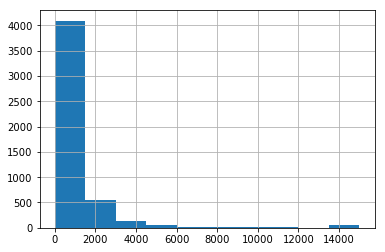

In [7]:
%matplotlib inline
league_ids['count'].hist()

Almost all the leagues have less than 2,500 toons on the ladder. The bump at 15000 is because that is the max depth of the ladder that the Path of Exile API allows you to retrieve.

In [8]:
list(league_ids[league_ids['count'] == 15000]['id'])

['1 Month Flashback (IC006)',
 '1 Month Flashback HC (IC007)',
 '1 Week Nemesis (S06W069)',
 '2 Week Charity Event',
 '3 Day Exiles Event HC (IC010)',
 '5 Day Solo Hardcore (IV002)',
 'Ambush',
 'Anarchy',
 'Beyond',
 'Bloodlines',
 'Breach',
 'Darkshrine (IC003)',
 'Darkshrine HC (IC004)',
 'Domination',
 'Essence',
 'Flashback Event (IC001)',
 'Flashback Event HC (IC002)',
 'Hardcore',
 'Hardcore Breach',
 'Hardcore Essence',
 'Hardcore Perandus',
 'Hardcore Prophecy',
 'Hardcore Talisman',
 'Headhunter (FRW001)',
 'Invasion',
 'Nemesis',
 'Nemesis One Week Race',
 'One Month Race',
 'One Month Race HC',
 'One Week HC Rampage/Beyond',
 'One Week Rampage/Beyond',
 'Onslaught',
 'Perandus',
 'Perandus Flashback',
 'Perandus Flashback HC',
 'Prophecy',
 'Rampage',
 'SG_Ambush',
 'SG_Hardcore',
 'SG_Rampage',
 'SG_Standard',
 'SG_Warbands',
 'Standard',
 'Talisman',
 'Tempest',
 'Torment',
 'Torment/Bloodlines',
 'Torment/Bloodlines HC',
 'Void',
 'Warbands',
 'Буря',
 'Одна жизнь',
 'От

As you might expect, most of these are season long leagues that take place over months. There are few shorter leagues, though. 

The '3 Day Exiles Event HC (IC010)' was an in between season event that awarded closed beta access to the next expansion for the top 200 players. Additionally exile everywhere races are especially unique, deadly (racers likely ended up having multiple toons), and entertaining :-D. In exiles everywhere, 20 rogue exiles (mini-bosses) spawn _per zone_. You can check out the [forum post](http://www.pathofexile.com/forum/view-thread/1293370) or ZiggyD [racing this event](https://www.youtube.com/watch?v=t3TBU_Kwbes) to see just how brutal these races are.

In fact, let's look at the experience distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114c79630>]], dtype=object)

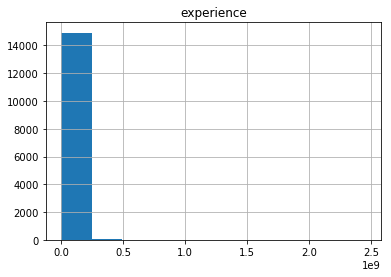

In [9]:
exiles_race = pd.read_sql_query('''
                                SELECT experience FROM ladders
                                WHERE id="3 Day Exiles Event HC (IC010)"
                                ''',
                                conn)
exiles_race.hist()

So... nearly everyone dies immediately with a few players able to get a good run going.

Can we predict how brutal a race is going to be based on its rules?

In [10]:
league_ids['id'][10]

'1 Hour Ancestral Solo (S1E98)'

In [11]:
def make_hist(id):
    race_experience = pd.read_sql_query('''
                                        SELECT experience FROM ladders
                                        WHERE id="{0}";
                                        '''.format(id),
                                        conn)
    race_experience.hist()

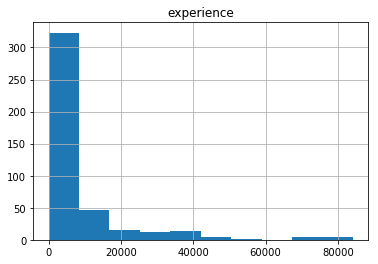

In [12]:
make_hist(league_ids['id'][13])

## Time series analysis

Read the whole leagues table into a pandas data frame so it's easier to work with.

In [13]:
leagues_df = pd.read_sql('SELECT * FROM leagues;', conn)

In [14]:
leagues_df.index = leagues_df['id']

Let's convert the start and end times to pandas datetime objects.

In [15]:
leagues_df['startAt'] = pd.to_datetime(leagues_df['startAt'], errors='coerce')
leagues_df['endAt'] = pd.to_datetime(leagues_df['endAt'], errors='coerce')

Now we can see how many events there have been over time.

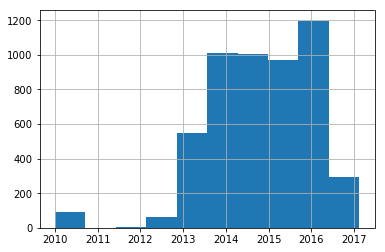

In [16]:
leagues_df['startAt'].hist()

Hmm, what's that bump around 2010?

In [17]:
leagues_df[leagues_df['startAt'] < '2011']

,id,description,startAt,endAt,registerAt,url,rules,event
id,,,,,,,,
RU_Disabled 735,RU_Disabled 735,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 736,RU_Disabled 736,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 737,RU_Disabled 737,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 738,RU_Disabled 738,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 739,RU_Disabled 739,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 740,RU_Disabled 740,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 741,RU_Disabled 741,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 742,RU_Disabled 742,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1
RU_Disabled 743,RU_Disabled 743,Подробности гонки можно найти на web.poe.garen...,2009-12-31 11:00:00,2009-12-31 11:00:00,2009-12-31T11:00:00Z,None,[{u'description': u'A character killed in Hard...,1


All of these RU_Disabled leagues are from when there was a Russian version of Path of Exile on Garena Russia's servers. It operated from mid-2015 to mid-2016 at which point Garena Russia closed and all accounts where transfered to European servers operated by Grinding Gear Games. Here is the [announcement forum post](https://www.pathofexile.com/forum/view-thread/1204892) and [closure post](https://www.pathofexile.com/forum/view-thread/1705330) for the Garena Russia servers.

Somehow all the times got defaulted to 11AM December 31st, 2009 during the migration :\. For our time series analysis we'll be dropping these mislabeled leagues. 

In [18]:
leagues_df = leagues_df[leagues_df['startAt'] > '2010']

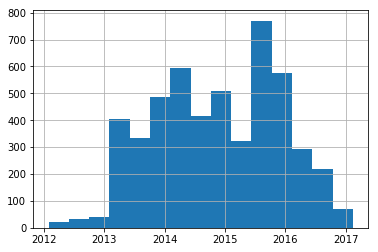

In [19]:
leagues_df['startAt'].hist(bins=15)

In [20]:
ladders_df = pd.read_sql('SELECT * FROM ladders;', conn)

Let's look at how popular the different classes have been over time

In [21]:
ladders_df['class'].unique()

array(['Duelist', 'Marauder', 'Witch', 'Templar', 'Shadow', 'Ranger',
       'Scion', 'Elementalist', 'Guardian', 'Slayer', 'Pathfinder',
       'Saboteur', 'Berserker', 'Hierophant', 'Chieftain', 'Champion',
       'Assassin', 'Gladiator', 'Inquisitor', 'Necromancer', 'Occultist',
       'Juggernaut', 'Trickster', 'Ascendant', 'Deadeye', 'Raider'], dtype=object)

In Path of Exile there are 7 basic classes ('Duelist', 'Marauder', 'Witch', 'Templar', 'Shadow', 'Ranger', 'Scion') and 19 subclasses ('Elementalist', 'Guardian', 'Slayer', 'Pathfinder', 'Saboteur', 'Berserker', 'Hierophant', 'Chieftain', 'Champion', 'Assassin', 'Gladiator', 'Inquisitor', 'Necromancer', 'Occultist', 'Juggernaut', 'Trickster', 'Ascendant', 'Deadeye', 'Raider'). 

Let's first look at how the popularity of just the 7 basic classes have changed over time.

In [22]:
class_to_subclasses = {'Duelist': ['Slayer','Gladiator', 'Champion'],
                       'Marauder': ['Juggernaut', 'Berserker', 'Chieftain'],
                       'Witch': ['Necromancer', 'Occultist', 'Elementalist'],
                       'Templar': ['Inquisitor', 'Heirophant', 'Guardian'],
                       'Shadow': ['Assassin', 'Saboteur', 'Trickster'],
                       'Ranger': ['Deadeye', 'Raider', 'Pathfinder'],
                       'Scion': ['Ascendant']
                      }

In [23]:
counts_dfs ={}
for class_name in class_to_subclasses:
    # DF with just characters of a certain base class
    df = ladders_df[ladders_df['class'].isin(class_to_subclasses[class_name] + [class_name])]
    
    counts_dfs[class_name.lower() + '_count'] = df.groupby('id').size()

It would also be nice to keep track of the total number of characters in a league.

In [24]:
counts_dfs['character_count'] = ladders_df.groupby(['id']).size()

Let's merge these into a single dataframe.

In [25]:
all_counts_df = pd.DataFrame(counts_dfs).fillna(0)

In [26]:
all_counts_df

,character_count,duelist_count,marauder_count,ranger_count,scion_count,shadow_count,templar_count,witch_count
1 Hour AI Party (S04F131),546,110.0,68.0,107.0,0.0,99.0,80.0,82.0
1 Hour Ancestral EL (S04F050),1153,253.0,159.0,235.0,0.0,155.0,209.0,142.0
1 Hour Ancestral Party (S06F026),1808,237.0,246.0,230.0,622.0,169.0,133.0,171.0
1 Hour Ancestral Party (S07C006),2840,326.0,408.0,423.0,556.0,391.0,314.0,422.0
1 Hour Ancestral Solo (S08C046),1770,201.0,242.0,217.0,315.0,264.0,216.0,315.0
1 Hour Ancestral Solo (S08C084),921,117.0,113.0,98.0,125.0,155.0,132.0,181.0
1 Hour Ancestral Solo (S08C159),571,80.0,81.0,59.0,109.0,82.0,70.0,90.0
1 Hour Ancestral Solo (S1E100),477,72.0,58.0,82.0,0.0,95.0,90.0,80.0
1 Hour Ancestral Solo (S1E51),2201,474.0,395.0,357.0,0.0,376.0,300.0,299.0
1 Hour Ancestral Solo (S1E52),1389,268.0,251.0,219.0,0.0,236.0,213.0,202.0


In [27]:
leagues_df = leagues_df.join(all_counts_df)

In [28]:
leagues_df

,id,description,startAt,endAt,registerAt,url,rules,event,character_count,duelist_count,marauder_count,ranger_count,scion_count,shadow_count,templar_count,witch_count
id,,,,,,,,,,,,,,,,
Standard,Standard,The default game mode.,2013-01-23 21:00:00,NaT,None,http://pathofexile.com/forum/view-thread/71278,[],0,15000.0,1252.0,2036.0,3332.0,1989.0,2024.0,939.0,3345.0
Hardcore,Hardcore,A character killed in the Hardcore league is m...,2013-01-23 21:00:00,NaT,None,http://pathofexile.com/forum/view-thread/71276,[{u'description': u'A character killed in Hard...,0,15000.0,2208.0,2645.0,1857.0,2134.0,1757.0,1277.0,2988.0
Jan30 3h Rush HC,Jan30 3h Rush HC,A 3 hour hardcore ladder rush with prizes. See...,2012-01-29 21:00:00,2012-01-30 00:00:00,None,None,[{u'description': u'A character killed in Hard...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feb13 HC Unique Rush,Feb13 HC Unique Rush,A 3 hour hardcore ladder rush with unique priz...,2012-02-12 21:00:00,2012-02-13 00:00:00,None,None,[{u'description': u'A character killed in Hard...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A6 LAN Event,A6 LAN Event,A private league for the A6 LAN tournament. Re...,2012-02-18 07:00:03,2012-02-18 08:30:03,None,None,[{u'description': u'League requires a password...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feb26 HC Ladder Rush,Feb26 HC Ladder Rush,A 3 hour hardcore ladder rush with prizes. See...,2012-02-25 21:00:00,2012-02-26 00:00:00,None,None,[{u'description': u'A character killed in Hard...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mar4 HC Ladder Rush,Mar4 HC Ladder Rush,A 3 hour hardcore ladder rush with prizes. See...,2012-03-03 21:00:00,2012-03-04 00:00:00,None,None,[{u'description': u'A character killed in Hard...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mar11 HC Ladder Rush,Mar11 HC Ladder Rush,A 3 hour ladder rush with prizes. See the foru...,2012-03-10 21:00:00,2012-03-11 00:00:00,None,None,[{u'description': u'A character killed in Hard...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mar18 HC Ladder Rush,Mar18 HC Ladder Rush,A 3 hour ladder rush with prizes. See the foru...,2012-03-17 21:00:00,2012-03-18 00:00:00,None,None,[{u'description': u'A character killed in Hard...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
leagues_df.isnull().sum()

id                   0
description          0
startAt              0
endAt                3
registerAt           0
url                  0
rules                0
event                0
character_count    142
duelist_count      142
marauder_count     142
ranger_count       142
scion_count        142
shadow_count       142
templar_count      142
witch_count        142
dtype: int64

Several of these races didn't have ladders with racers (they were private or otherwise scrubbed).

We can see there are 142 of these 'empty' races.

In [30]:
for class_name in class_to_subclasses:
    cname = class_name.lower()
    leagues_df[cname + '_ratio'] = leagues_df[cname + '_count']/leagues_df['character_count']

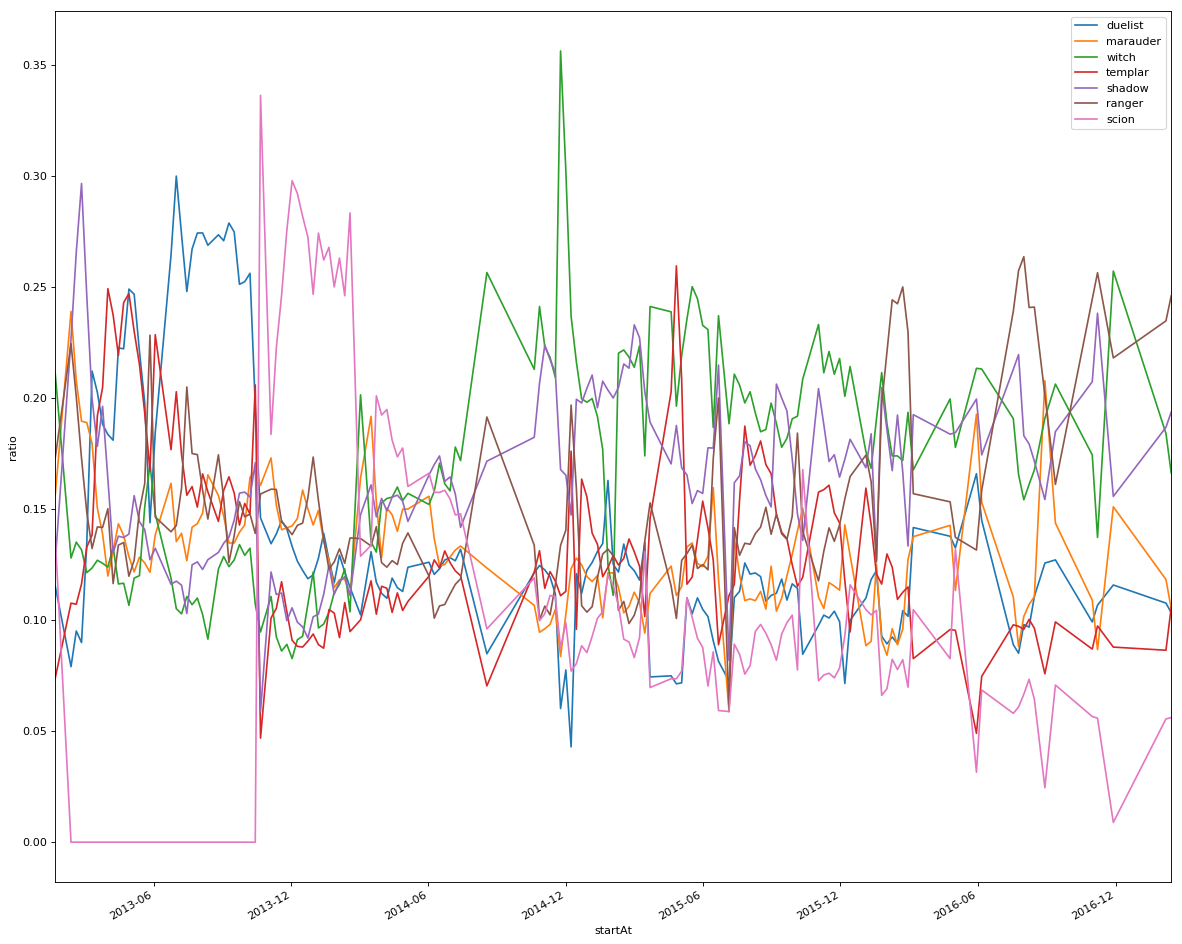

In [31]:
# TODO: When I resample by averaging ratios, is this appropriate?
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for class_name in class_to_subclasses:
    cname = class_name.lower()
    time_series = pd.Series(leagues_df[cname + '_ratio'].values, index=leagues_df['startAt'])
    time_series.resample('7D').median().dropna().plot(label=cname)

plt.ylabel('ratio')
plt.legend()
plt.show()

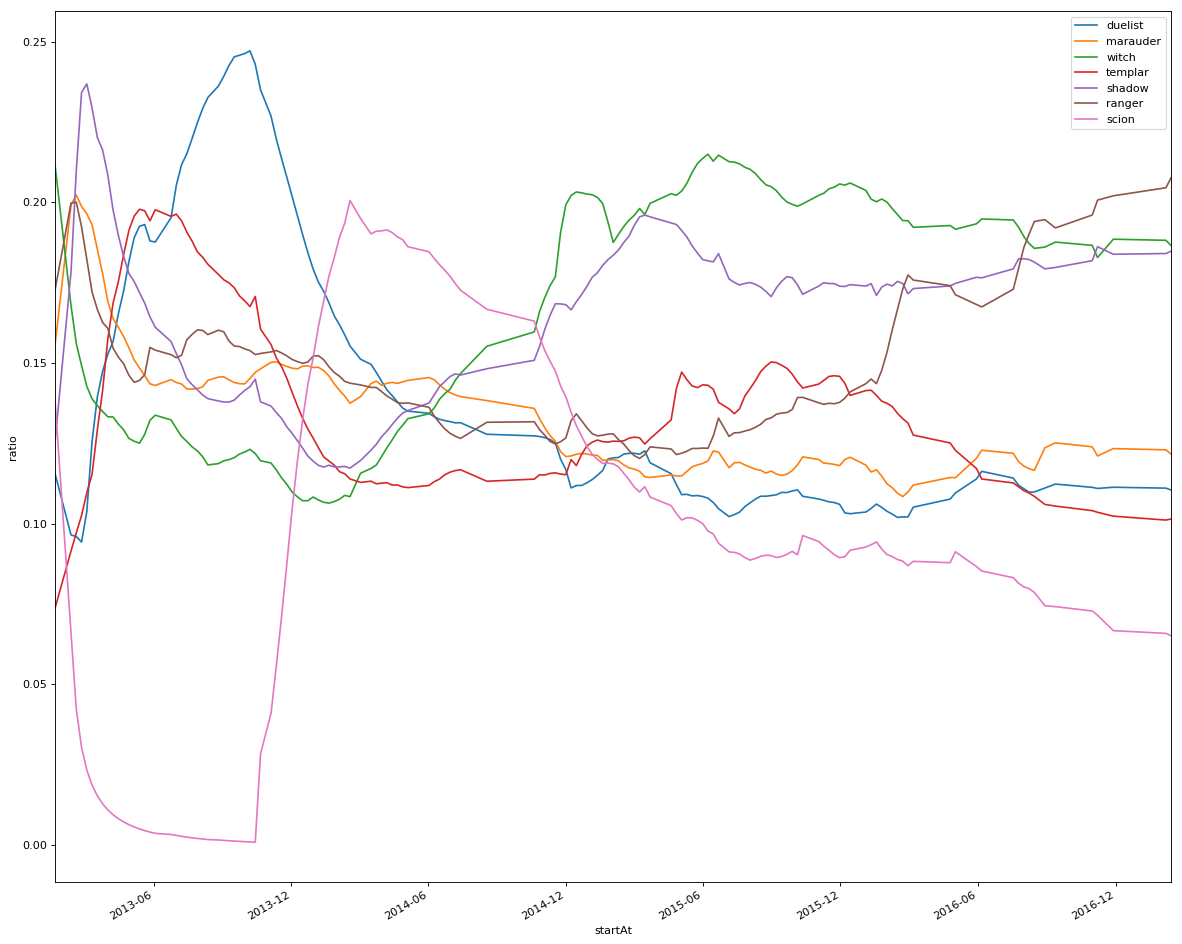

In [32]:
# TODO smoothed plot
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for class_name in class_to_subclasses:
    cname = class_name.lower()
    time_series = pd.Series(leagues_df[cname + '_ratio'].values, index=leagues_df['startAt'])
    time_series.resample('7D').median().dropna().ewm(span=25).mean().plot(label=cname)

plt.ylabel('ratio')
plt.legend()
plt.show()

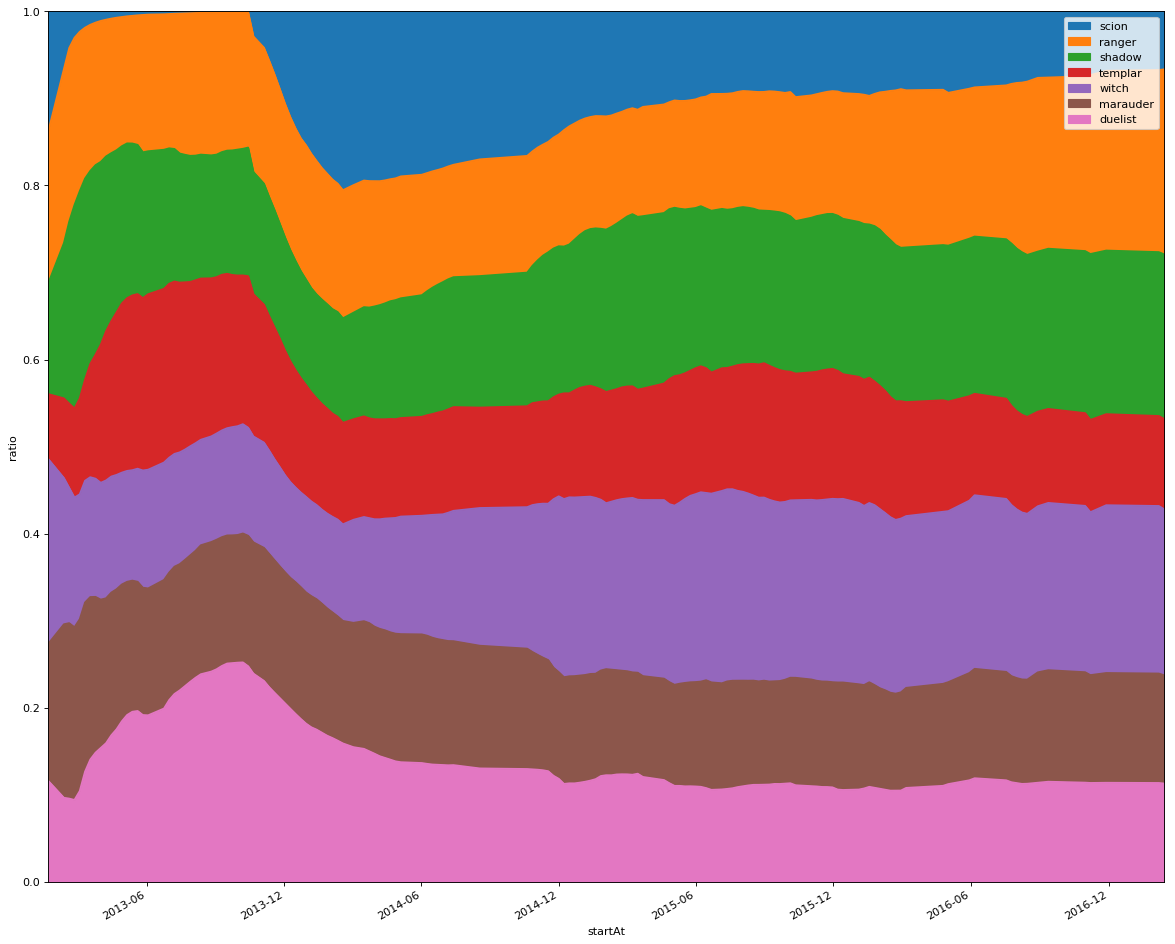

In [33]:
# TODO smoothed plot
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

sum_ratios = 0
for class_name in class_to_subclasses:
    cname = class_name.lower()
    time_series = pd.Series(leagues_df[cname + '_ratio'].values, index=leagues_df['startAt'])
    sum_ratios += (time_series.resample('7D').median().dropna().ewm(span=25).mean())

first = pd.Series(leagues_df['duelist' + '_ratio'].values, index=leagues_df['startAt'])
fist = (time_series.resample('7D').median().dropna().ewm(span=25).mean())/sum_ratios
last = 0

smoothed_series = []
for i, class_name in enumerate(class_to_subclasses):
    cname = class_name.lower()
    time_series = pd.Series(leagues_df[cname + '_ratio'].values, index=leagues_df['startAt'])
    smoothed_series.append([cname, time_series.resample('7D').median().dropna().ewm(span=25).mean()/sum_ratios + last])
    last = (time_series.resample('7D').median().dropna().ewm(span=25).mean()/sum_ratios + last)

for cname,series in smoothed_series[::-1]:
    series.plot.area(label=cname)

plt.ylabel('ratio')
plt.ylim([0,1])
plt.legend()
plt.show()

## Tracking players

In [34]:
steels_races = ladders_df[ladders_df['account'] == "Steelmage"]
steels_races.groupby('id')['rank'].min()

id
1 Hour Ancestral Party (S06F026)     389
1 Hour Ancestral Solo (S08C084)       17
1 Hour BLAMT Party (S08F045)          20
1 Hour BLAMT Party (S08F101)         608
1 Hour BLAMT Solo (S06F092)           97
1 Hour BM Famine Party (S06F116)      37
1 Hour BM Famine Solo (S08C093)       16
1 Hour BM Famine Solo (S08C134)       15
1 Hour Brutus Kill (S09V042)         711
1 Hour Descent (S07C015)              85
1 Hour Descent (S08C054)              24
1 Hour Descent (S08C062)              30
1 Hour Descent (S08C092)              10
1 Hour Descent (S08C131)            1113
1 Hour Descent (S08C154)               2
1 Hour ELBLAMT (S06F159)             461
1 Hour Emberwake (EWS001)           6635
1 Hour Emberwake (EWS017)             22
1 Hour Emberwake (EWS018)             10
1 Hour Emberwake (EWS023)           2514
1 Hour Emberwake (EWS119)            233
1 Hour Endless Ledge (MDC024)         17
1 Hour Endless Ledge (MDC091)        242
1 Hour Endless Ledge (S06F021)       956
1 Hour Endles

In [35]:
def get_player_ranks(player):
    races = ladders_df[ladders_df['account'] == player]
    return races.groupby('id')['rank'].min()

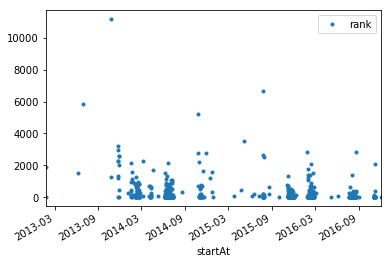

In [36]:
steel_mage = pd.DataFrame(get_player_ranks("Steelmage"))
steel_mage.join(leagues_df[['id','startAt']]).plot('startAt', 'rank', style='.')

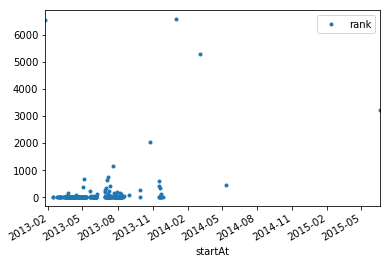

In [37]:
krippers = pd.DataFrame(get_player_ranks("Krippers"))
krippers.join(leagues_df[['id','startAt']]).plot('startAt', 'rank', style='.')

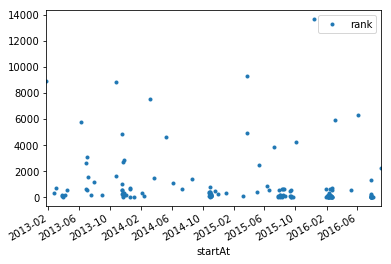

In [38]:
ziggyD = pd.DataFrame(get_player_ranks("ZiggyD"))
ziggyD.join(leagues_df[['id','startAt']]).dropna().plot('startAt', 'rank', style='.')

## Race difficulty

In [39]:
conn.close()